In [2]:
# Importing supporting libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data
data = pd.read_csv("data.csv")
data.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
# Creating a linear regression model:
# splitting the data to Independednt Variables -> x and dependednt variables -> y
X = data.iloc[:,0:3].values
y = data.iloc[:,-1].values 

In [5]:
# train test split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [6]:
# Creating a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [8]:
# Residual calculation :: actual - predicted
y_pred = model.predict(X_test) #predicted
residual = y_test - y_pred

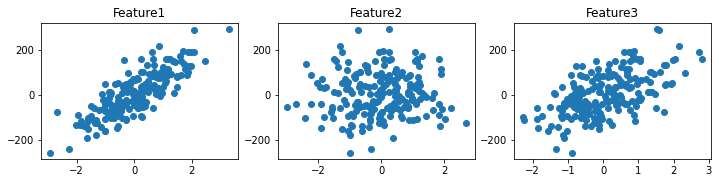

In [9]:
## 1. Linear Relationship between independent variables and dependent[target] variable:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(data['feature1'], data['target'])
ax1.set_title("Feature1")
ax2.scatter(data['feature2'], data['target'])
ax2.set_title("Feature2")
ax3.scatter(data['feature3'], data['target'])
ax3.set_title("Feature3")

plt.show()

In [10]:
## 2.No Multicollinearity between independent variables:

# Two ways to find them:
  # 1. VIF -> Variation Infleation Factor {should be less than 5(generally) for each 
  # independent variable}
  # 2. Heatmap of the Independent Variables (Less effective)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

pd.DataFrame({'vif': vif}, index=data.columns[0:3]).T

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,feature1,feature2,feature3
vif,1.009656,1.013895,1.012928


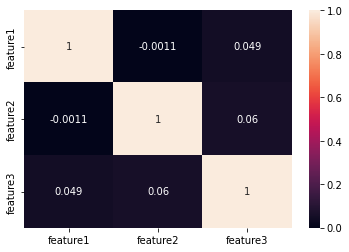

In [11]:
# Another Technique
sns.heatmap(data.iloc[:,0:3].corr(),annot=True)

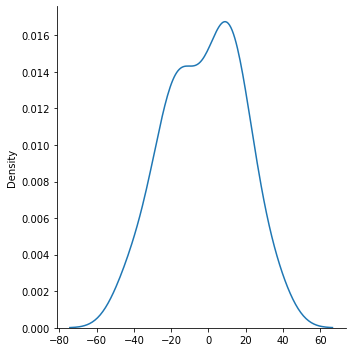

In [12]:
## 3. Normality of Residual

sns.displot(residual,kind='kde')

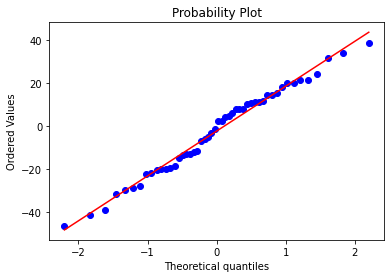

In [13]:
# QQ Plot :: to check for normal disribution of residuals

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

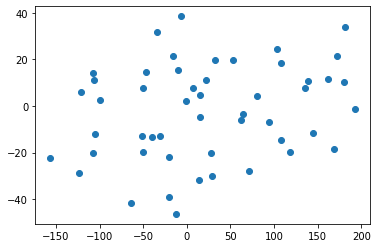

In [14]:
## 4. Homoscedasticity :: Even spread of variances (output for a single input)

plt.scatter(y_pred,residual)

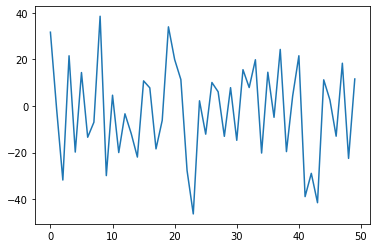

In [15]:
## 5. Autocorrelation of Residuals :: no relation in the residuals

plt.plot(residual)